# 1) Package Prep

In [10]:
import copy
import math

In [13]:
#load libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn as sk
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

# 2) Data Engineering

In [19]:
#Load in dataset
diamonds = pd.read_csv("Sarah Gets a Diamond.csv", sep = ',')

#Preview front of data
diamonds.head()

Shape (9142, 9)


,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1,1.10,Ideal,H,SI1,VG,EX,GIA,"$5,169"
1,2,0.83,Ideal,H,VS1,ID,ID,AGSL,"$3,470"
2,3,0.85,Ideal,H,SI1,EX,EX,GIA,"$3,183"
3,4,0.91,Ideal,E,SI1,VG,VG,GIA,"$4,370"
4,5,0.83,Ideal,G,SI1,EX,EX,GIA,"$3,171"


In [20]:
#Preview back of data
diamonds.tail()
    #observe how the prices at the end of the df are NULL

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
9137,9138,0.96,Ideal,F,SI1,EX,EX,GIA,NaN
9138,9139,1.02,Very Good,E,VVS1,EX,G,GIA,NaN
9139,9140,1.51,Good,I,VS1,G,G,GIA,NaN
9140,9141,1.24,Ideal,H,VS2,VG,VG,GIA,NaN
9141,9142,0.79,Ideal,I,VS1,EX,EX,GIA,NaN


In [23]:
#convert necessary vars into categoricals (autocreate dummies, dropping first level)
diamonds_full = pd.get_dummies(data=diamonds, columns = ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report'], drop_first=True)
diamonds_full.head()

,ID,Carat Weight,Price,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1,1.10,"$5,169",0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2,0.83,"$3,470",0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,3,0.85,"$3,183",0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,0.91,"$4,370",0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
4,5,0.83,"$3,171",0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [27]:
#split into train and test sets
N_train = 6000
diamonds_train = diamonds_full[:N_train]
diamonds_test = diamonds_full[N_train:]

diamonds_test.head()

,ID,Carat Weight,Price,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
6000,6001,2.18,NaN,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6001,6002,2.32,NaN,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
6002,6003,0.77,NaN,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
6003,6004,2.01,NaN,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
6004,6005,1.39,NaN,0,0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [33]:
#define what is to be predicted and what to use for predictions
y_sarah = diamonds_train['Price']
x_sarah = copy.deepcopy(diamonds_train).drop(['ID', 'Price'], axis = 1)
x_predict_sarah = copy.deepcopy(diamonds_test).drop(['ID', 'Price'], axis = 1)

x_sarah.head()

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1.10,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,0.83,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,0.85,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.91,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,0.83,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# 3) Data Visualization

C:\Users\ianno\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\ianno\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ianno\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

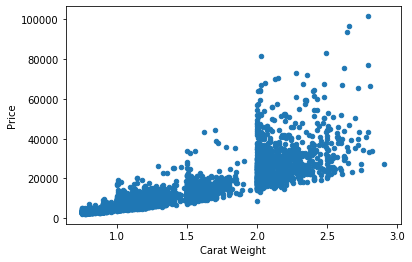

In [36]:
#scatter plot

def remove_dollar_sign(s):
    return s.replace("$","")
def remove_comma(s):
    return s.replace(",","")
diamonds_train['Price'] = diamonds_train['Price'].map(remove_comma)
diamonds_train['Price'] = diamonds_train['Price'].map(remove_dollar_sign)
diamonds_train['Price'] = diamonds_train['Price'].astype('float64')

diamonds_train.plot.scatter('Carat Weight', 'Price')

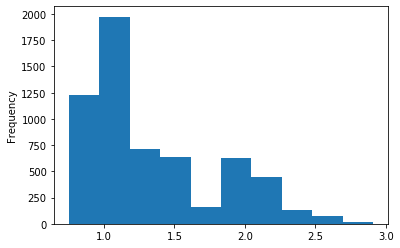

In [38]:
#histogram
diamonds_train['Carat Weight'].plot.hist()

# 4) Train and Test

In [41]:
#split known df into train and test sets using random split function
from sklearn.model_selection import train_test_split
X_train_sarah_rnd, X_test_sarah_rnd, y_train_sarah_rnd, y_test_sarah_rnd = train_test_split(x_sarah, y_sarah, test_size=1000, random_state=42)

# 5) Prediction Scores

In [42]:
def compute_mape_score(y_test_input, y_pred_input):
    y_test_input = np.array(y_test_input).reshape(-1,)
    y_pred_input = np.array(y_pred_input).reshape(-1,)
    percent_errors = np.abs((y_test_input - y_pred_input) / y_test_input) * 100
    return np.mean(np.array(percent_errors))

SCORING_CONFIG = {'mape' : compute_mape_score}

# 6) Modelling

In [45]:
#Build linear model using statsmodels package
x_sarah_sm = sm.add_constant(x_sarah) #statsmodel doesn't add intercept (R >>>)
ols_sm = sm.OLS(y_sarah, x_sarah_sm).fit()
ols_sm.summary()

C:\Users\ianno\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).